<a href="https://colab.research.google.com/github/TashreefMuhammad/University_Miscellaneous_Codes/blob/main/Matrix_Factorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'skyblue'>CSE 4238 : Soft Computing Lab</font>


## <font color = 'navyblue'>Assignment 01: Matrix Factorization</font>



### Download Data
Download the Data from drive

In [ ]:
# Install gdown

#======== For Kaggle and / or Colab
! pip install gdown
# Download index_id.csv from the url => 
# https://drive.google.com/file/d/1ENbB5srTy8_y5qDvOVNwHjAXgPW6BJiZ/view?usp=sharing
!gdown --id 1ENbB5srTy8_y5qDvOVNwHjAXgPW6BJiZ

# # Download Matrix_Factorization_Assignment.csv from the url => 
# https://drive.google.com/file/d/1ENbB5srTy8_y5qDvOVNwHjAXgPW6BJiZ/view?usp=sharing
!gdown --id 1lzG9JhF-8Smr87ZlhHdnA-Fgx4JlyQXW

### Import Libraries

Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity

### Extracting Data to DataFrame

Retirieving data from CSV and saving them in DataFrame

In [ ]:
indexDataFrame = pd.read_csv('index_id.csv')

# infoArray = indexDataFrame[indexDataFrame['Student Id'] == 170104014].values
# print(infoArray)

ind_id = indexDataFrame[indexDataFrame['Student Id'] == 170104014].values[0][2]
print(ind_id)

data = pd.read_csv('Matrix_Factorization_Assignment.csv')
data

261


,Index,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,11071,1.0,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,...,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,19900,NaN,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,...,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,25325,5.0,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,...,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,31006,3.0,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,...,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,37002,2.0,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,...,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,3964,1.0,NaN,NaN,10.0,8.0,NaN,5.0,9.0,1.0,...,NaN,NaN,9.0,5.0,9.0,4.0,NaN,1.0,NaN,4.0
44996,17258,3.0,2.0,3.0,7.0,NaN,10.0,9.0,NaN,NaN,...,3.0,NaN,3.0,NaN,NaN,5.0,4.0,NaN,NaN,8.0
44997,20528,NaN,9.0,NaN,3.0,1.0,NaN,7.0,10.0,10.0,...,3.0,4.0,NaN,NaN,NaN,2.0,10.0,0.0,1.0,4.0
44998,1875,10.0,NaN,7.0,3.0,3.0,8.0,NaN,8.0,9.0,...,NaN,NaN,NaN,3.0,5.0,NaN,6.0,NaN,8.0,8.0


### Preparing Data for Use

* Copy All Data into another DataFrame
* Remove the Index Column from the new DataFrame
* Find Rows and Columns that should be removed and then drop those [Rows](https://www.geeksforgeeks.org/how-to-drop-rows-in-pandas-dataframe-by-index-labels/) and [Columns](https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/)

In [ ]:
my_data = data.copy()
# print(my_data.columns)
# my_data = my_data.drop(['Index'], axis = 1)
# print(my_data.columns)
# del data

# print(len(my_data['Index'].unique()))
dropList = [my_data['Index'][i] for i in range(0, my_data.shape[0]) if int(my_data['Index'][i]) % ind_id == 0]
dropRowList = [my_data.index[i] for i in range(0, my_data.shape[0]) if int(my_data['Index'][i]) % ind_id == 0]
my_data.drop(dropRowList, inplace = True)
# print(len(dropList))
# print(dropList)
# print(sorted(dropList))

i = 0
while i < 45000:
    i *= 261
    if i not in dropList:
        print(i, 'not found')
    i += 1
print(min(dropList))
print(max(dropList))

my_data = my_data.drop(['Index'], axis = 1)
dropColList = [i for i in range(1, my_data.shape[1]) if i % ind_id == 0]
my_data.drop(my_data.columns[dropColList], axis = 1, inplace = True)
print(sum(my_data.isna().sum()))
my_data

68382 not found
0
49851
87550723


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1.0,7.0,1.0,9.0,6.0,6.0,8.0,NaN,NaN,10.0,...,2.0,NaN,7.0,9.0,6.0,10.0,7.0,NaN,NaN,NaN
1,NaN,3.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,NaN,...,NaN,NaN,NaN,5.0,9.0,3.0,0.0,NaN,9.0,2.0
2,5.0,7.0,NaN,9.0,5.0,6.0,5.0,0.0,NaN,10.0,...,NaN,9.0,10.0,NaN,NaN,9.0,0.0,NaN,NaN,7.0
3,3.0,4.0,1.0,NaN,5.0,NaN,10.0,NaN,8.0,0.0,...,3.0,2.0,1.0,3.0,NaN,NaN,2.0,NaN,4.0,2.0
4,2.0,0.0,5.0,0.0,3.0,5.0,NaN,NaN,NaN,0.0,...,9.0,NaN,5.0,3.0,5.0,1.0,6.0,6.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,1.0,NaN,NaN,10.0,8.0,NaN,5.0,9.0,1.0,3.0,...,NaN,NaN,9.0,5.0,9.0,4.0,NaN,1.0,NaN,4.0
44996,3.0,2.0,3.0,7.0,NaN,10.0,9.0,NaN,NaN,1.0,...,3.0,NaN,3.0,NaN,NaN,5.0,4.0,NaN,NaN,8.0
44997,NaN,9.0,NaN,3.0,1.0,NaN,7.0,10.0,10.0,NaN,...,3.0,4.0,NaN,NaN,NaN,2.0,10.0,0.0,1.0,4.0
44998,10.0,NaN,7.0,3.0,3.0,8.0,NaN,8.0,9.0,NaN,...,NaN,NaN,NaN,3.0,5.0,NaN,6.0,NaN,8.0,8.0


Given index_id = 261

Real Number of Rows = 45000

So, Found Number of Rows that should be Removed $= 169$


Real Number of Columns = 5000 <font color = 'red'>(Excluding Index Column) </font> 

So, Number of Columns that should be Removed $= \lfloor \frac{5000}{261} \rfloor = 19$


Hence, after removing rows and column, the final DataFrame size should be: 

$(45000 - 169) \times (5000 - 19) \boldsymbol{\Rightarrow} 44831 \times 4981$

### Getting NumPy Array

Converting data to **NumPy** array for future processing

In [ ]:
# tmp_data = np.array(my_data)
# print(tmp_data)
# del tmp_data

my_data = my_data.replace(np.nan, -1)
my_data = np.array(my_data, dtype = np.float32)
print(my_data)
print(sum(sum(my_data)))

my_data += 1.
print(my_data)
print(sum(sum(my_data)))

[[ 1.  7.  1. ... -1. -1. -1.]
 [-1.  3.  3. ... -1.  9.  2.]
 [ 5.  7. -1. ... -1. -1.  7.]
 ...
 [-1.  9. -1. ...  0.  1.  4.]
 [10. -1.  7. ... -1.  8.  8.]
 [ 0.  7.  0. ... -1.  2. -1.]]
591199880.0
[[ 2.  8.  2. ...  0.  0.  0.]
 [ 0.  4.  4. ...  0. 10.  3.]
 [ 6.  8.  0. ...  0.  0.  8.]
 ...
 [ 0. 10.  0. ...  1.  2.  5.]
 [11.  0.  8. ...  0.  9.  9.]
 [ 1.  8.  1. ...  0.  3.  0.]]
814503091.0


### Define Useful Methods

Define useful methods for the algorithm

In [ ]:
def updateMatrix(givenData, staticData, regulizer, K):
    partA = (staticData.T).dot(staticData) + regulizer * np.eye(k)
    partB = givenData.dot(staticData)

    return partB.dot(np.linalg.inv(partA))

def lossCalc(trueData, predData):
    indUse = np.nonzero(trueData)
    # print(type(indUse))
    errorLib = mean_squared_error(trueData[indUse], predData[indUse])
    
    # ==== Comparison returned 7.083543050729694e-23 difference
    # ==== between library value and calculated value. So, only
    # ==== library value is taken for calculation
    # errorCus = 0
    # num = 0

    # for i, j in nonZeroInd:
    #   errorCus += (trueData[i][j] - predData[i][j]) ** 2
    #   num += 1
    # for i in range(trueData.shape[0]):
    #   for j in range(trueData.shape[1]):
    #     if trueData[i][j] != 0.:
    #       errorCus += (trueData[i][j] - predData[i][j]) ** 2
    #       num += 1
  
    # errorCus /= num

    # if errorLib != errorCus:
        #   print((errorLib - errorCus) ** 2)
    return errorLib
    # return errorCus

### Matrix Factorization

The main coding module for **Matrix Factorization**

Running on K = 100


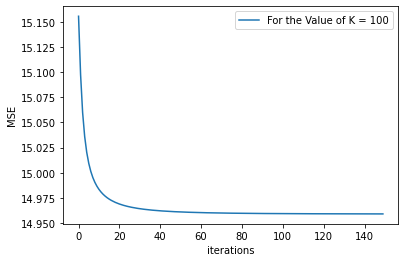

Running on K = 1000


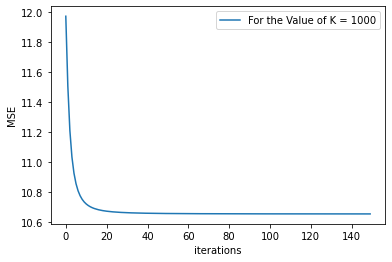

Running on K = 2000


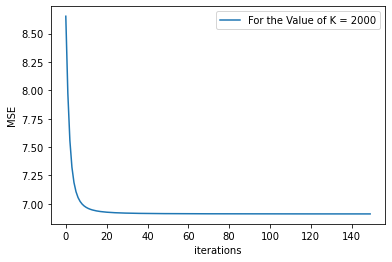

Running on K = 2500


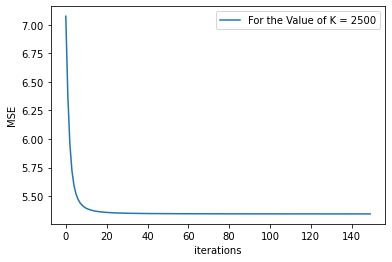

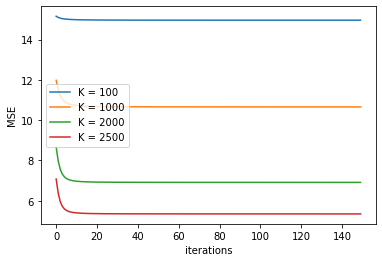

In [ ]:
N, M = my_data.shape
errorVals = []
loopK = [100, 1000, 2000, 2500]

for k in loopK:
    print('Running on K = ' + str(k))
    errorVal = []
    V = np.zeros((M, k), dtype = np.float32)
    np.random.seed(14)
    U = np.random.random((N, k)).astype(dtype = np.float32)
    U /= sum(sum(U))
    # print(U)
    # print(sum(sum(U)))
    lambdaU = (0.00015 + 0.0001 * (ind_id % 8))
    lambdaV = (0.00025 - 0.0001 * (ind_id % 7))

    for _ in range(151):
        # print(U.shape, V.shape)
        V = updateMatrix(my_data.T, U, lambdaV, k)
        # print(U.shape, V.shape)
        U = updateMatrix(my_data, V, lambdaU, k)
        # print(U.shape, V.shape)
        errorVal.append(lossCalc(my_data, U.dot(V.T)))
        
    plt.plot(errorVal, label = 'For the Value of K = ' + str(k))
    plt.xlabel('iterations')
    plt.ylabel('MSE')
    plt.legend(loc = 'best')
    plt.show()
    
    errorVals.append(errorVal)

for i, eVal in enumerate(errorVals):
    plt.plot(eVal, label = 'K = ' + str(loopK[i]))
plt.xlabel('iterations')
plt.ylabel('MSE')
plt.legend(loc = 'best')
plt.show()

Running on K = 3000


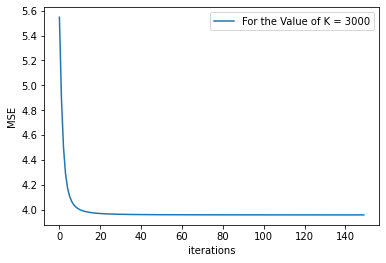

Running on K = 4000


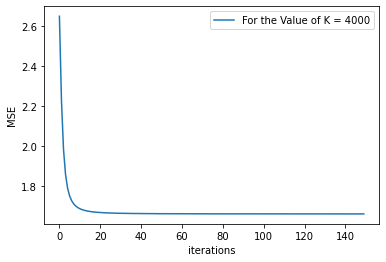

Running on K = 5000
Loss has reached a very small value, breaking training


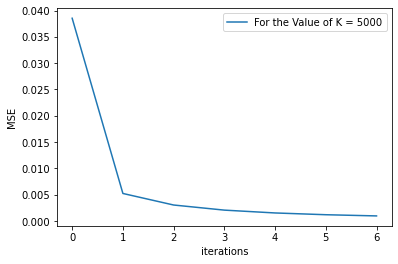

IndexError: list index out of range

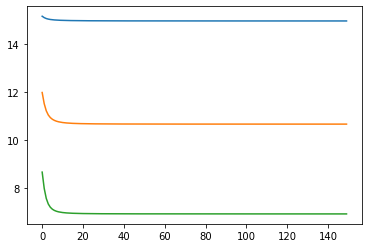

In [ ]:
N, M = my_data.shape
loopK = [3000, 4000, 5000]

for k in loopK:
    print('Running on K = ' + str(k))
    errorVal = []
    V = np.zeros((M, k), dtype = np.float32)
    np.random.seed(14)
    U = np.random.random((N, k)).astype(dtype = np.float32)
    U /= sum(sum(U))
    # print(U)
    # print(sum(sum(U)))
    lambdaU = (0.00015 + 0.0001 * (ind_id % 8))
    lambdaV = (0.00025 - 0.0001 * (ind_id % 7))

    for _ in range(150):
        # print(U.shape, V.shape)
        V = updateMatrix(my_data.T, U, lambdaV, k)
        # print(U.shape, V.shape)
        U = updateMatrix(my_data, V, lambdaU, k)
        # print(U.shape, V.shape)
        loss = lossCalc(my_data, U.dot(V.T))
        errorVal.append(loss)
        
        if loss < 0.001:
            print('Loss has reached a very small value, breaking training')
            break
        
    plt.plot(errorVal, label = 'For the Value of K = ' + str(k))
    plt.xlabel('iterations')
    plt.ylabel('MSE')
    plt.legend(loc = 'best')
    plt.show()
    
    errorVals.append(errorVal)

for i, eVal in enumerate(errorVals):
    plt.plot(eVal, label = 'K = ' + str(loopK[i]))
plt.xlabel('iterations')
plt.ylabel('MSE')
plt.legend(loc = 'best')
plt.show()

In [ ]:
N, M = my_data.shape
loopK = [5000]

for k in loopK:
    print('Running on K = ' + str(k))
    errorVal = []
    V = np.zeros((M, k), dtype = np.float32)
    np.random.seed(14)
    U = np.random.random((N, k)).astype(dtype = np.float32)
    U /= sum(sum(U))
    # print(U)
    # print(sum(sum(U)))
    lambdaU = (0.00015 + 0.0001 * (ind_id % 8))
    lambdaV = (0.00025 - 0.0001 * (ind_id % 7))

    for _ in range(150):
        # print(U.shape, V.shape)
        V = updateMatrix(my_data.T, U, lambdaV, k)
        # print(U.shape, V.shape)
        U = updateMatrix(my_data, V, lambdaU, k)
        # print(U.shape, V.shape)
        loss = lossCalc(my_data, U.dot(V.T))
        errorVal.append(loss)
        
        if loss < 0.001:
            print('Loss has reached a very small value, breaking training')
        
    plt.plot(errorVal, label = 'For the Value of K = ' + str(k))
    plt.xlabel('iterations')
    plt.ylabel('MSE')
    plt.legend(loc = 'best')
    plt.show()
    
    errorVals.append(errorVal)

for i, eVal in enumerate(errorVals):
    plt.plot(eVal, label = 'K = ' + str(loopK[i]))
plt.xlabel('iterations')
plt.ylabel('MSE')
plt.legend(loc = 'best')
plt.show()

Running on K = 5000


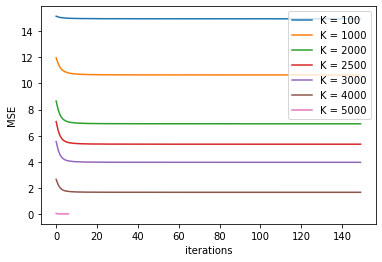

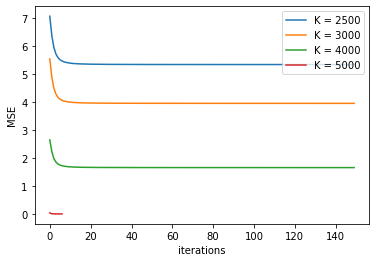

In [ ]:
loopK = [100, 1000, 2000, 2500, 3000, 4000, 5000]
for i, eVal in enumerate(errorVals):
    plt.plot(eVal, label = 'K = ' + str(loopK[i]))
plt.xlabel('iterations')
plt.ylabel('MSE')
plt.legend(loc = 'best')
plt.show()

loopK = [100, 1000, 2000, 2500, 3000, 4000, 5000]
for i, eVal in enumerate(errorVals):
    if i < 3:
        continue
    plt.plot(eVal, label = 'K = ' + str(loopK[i]))
plt.xlabel('iterations')
plt.ylabel('MSE')
plt.legend(loc = 'best')
plt.show()

In [ ]:
u_df = pd.DataFrame(U)
v_df = pd.DataFrame(V)

u_df.to_csv('U_Values.csv', index = False)
v_df.to_csv('V_Values.csv', index = False)

In [ ]:
for i, eVal in enumerate(errorVals):
    with open(str(loopK[i]) + '.txt', 'w') as fle:
        fle.write(str(eVal))

In [ ]:
# del data
# del u_df
# del v_df
similarity_u = cosine_similarity(U)
similarity_v = cosine_similarity(V)

print(similarity_u.shape)
print(similarity_u)
print(similarity_v.shape)
print(similarity_v)

similarity_u_df = pd.DataFrame(similarity_u)
similarity_v_df = pd.DataFrame(similarity_v)

similarity_u_df.to_csv('Similarity_U.csv', index = False)
similarity_v_df.to_csv('Similarity_V.csv', index = False)

MemoryError: Unable to allocate 15.0 GiB for an array with shape (44831, 44831) and data type float64

In [ ]:
# cosine_sim_u = pd.DataFrame(columns = ['U -> 1', 'U -> 2', 'Cosine Similarity'])
# for i in range(U.shape[0]):
#     for j in range(i + 1, U.shape[0]):
#         sim = cosine_similarity([U[i, :]], [U[j, :]])
#         val = [i, j, sim]
#         cosine_sim_u.loc[len(cosine_sim_u)] = val
# #         print(type(sim))
# #         print(sim.shape)
# cosine_sim_u.to_csv('Cosine Similarity U.csv', index = False)

In [ ]:
cosine_sim_v = pd.DataFrame(columns = ['V -> 1', 'V -> 2', 'Cosine Similarity'])
for i in range(V.shape[0]):
    for j in range(i + 1, V.shape[0]):
        sim = cosine_similarity([V[i, :]], [V[j, :]])
        val = [i, j, sim]
        cosine_sim_v.loc[len(cosine_sim_v)] = val
#         print(type(sim))
#         print(sim.shape)
cosine_sim_v.to_csv('Cosine Similarity V.csv', index = False)

KeyboardInterrupt: 

In [ ]:
cosine_sim_v.to_csv('Cosine Similarity V.csv', index = False)

In [ ]:
U = pd.read_csv('U_Values.csv')
V = pd.read_csv('V_Values.csv')

U = np.array(U)
V = np.array(V)

In [ ]:
# cnt = 0
# val = U.dot(V.T)
# print(val.shape)
# for i in range(my_data.shape[0]):
#     for j in range(my_data.shape[1]):
#         if my_data[i][j] == 0:
#             print(val[i][j])
#             if val[i][j] >= 1.0:
#                 print('Review of Movie ', j , 'by user 11071 is', val[0][j] - 1)
#                 cnt += 1
#                 if cnt == 5:
#                     break
#     print("End Row")

<br><br>
<center><font color = 'yellow'>$\LARGE{\text{The END}}$</font><center>